# INNOMATICS HACKATHON-18/09/2021

## Name:- Jayadeva Javali
## Mail:- jayadevajavali8@gmail.com

In [202]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Reading the Dataset

In [125]:
path = r"C:\Users\JAYADEVA JAVALI\Downloads\data.csv"
df = pd.read_csv(path)

### Basic Information of the dataset

In [126]:
df.head()

,x1,x2,y
0,-119.37,115.00,1.0
1,-101.11,97.78,1.0
2,-130.28,106.77,1.0
3,-114.70,101.20,1.0
4,-119.37,115.00,1.0


In [127]:
df.tail()

,x1,x2,y
2222,98.71,89.64,0.0
2223,96.63,91.00,0.0
2224,85.67,103.84,0.0
2225,78.96,78.61,0.0
2226,109.62,99999999.00,0.0


In [128]:
df.shape

(2227, 3)

In [129]:
df.columns

Index(['x1', 'x2', 'y'], dtype='object')

### High Level Information 

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   float64
dtypes: float64(3)
memory usage: 52.3 KB


In [131]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [132]:
if df.isnull().sum().any() == False:
    print("There are no missing values")
else:
    print("There are missing values")

There are missing values


In [133]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.819694,8.947626e+04,0.442299
std,74.939978,2.983323e+06,0.496771
min,-134.370000,-1.348800e+02,0.000000
25%,-71.757500,-8.013000e+01,0.000000
50%,-9.835000,-1.045000e+00,0.000000
75%,59.810000,6.389250e+01,1.000000
max,134.510000,1.000000e+08,1.000000


### Checking Correlations 

In [134]:
df.corr()

,x1,x2,y
x1,1.000000,0.037287,-0.121299
x2,0.037287,1.000000,-0.026724
y,-0.121299,-0.026724,1.000000


<AxesSubplot:>

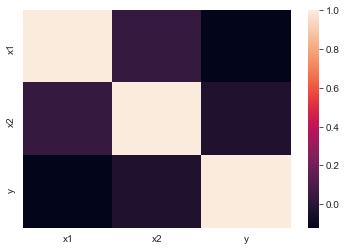

In [135]:
sns.heatmap(df.corr())

In [136]:
# Checking for duplicate rows
print("number of duplicate rows: ", df.duplicated().sum())

number of duplicate rows:  16


In [137]:
format_dict = {"x1" : "{:.2f}", "x2" : "{:.1f}", "y" : "{:.1f}"}

In [139]:
# Transforming them into NaN values
df.loc[df["x1"] == 0, "x1"] = np.nan 
df.loc[df["x2"] == 0, "x2"] = np.nan 

In [140]:
# Seeing the number of the new missing values
df[["x1", "x2", "y"]].isnull().sum()

x1    5
x2    5
y     0
dtype: int64

### Checking Correlations after Transforming

In [141]:
df.corr()

,x1,x2,y
x1,1.000000,0.037291,-0.121299
x2,0.037291,1.000000,-0.026733
y,-0.121299,-0.026733,1.000000


<AxesSubplot:>

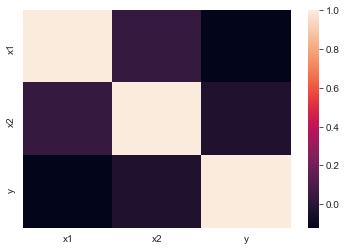

In [142]:
sns.heatmap(df.corr())

In [143]:
def get_corr(col):
    return df.corr().unstack()[col].sort_values(ascending = False)    

### Correlation 

In [144]:
print("x1 correlations\n\n{0}\n\n{3}\n\nx2 correlations\n\n{1}\n\n{3}\n\ny correlations\n\n{2}".format(get_corr("x1"), get_corr("x2"), get_corr("y"), 25*"-"))

x1 correlations

x1    1.000000
x2    0.037291
y    -0.121299
dtype: float64

-------------------------

x2 correlations

x2    1.000000
x1    0.037291
y    -0.026733
dtype: float64

-------------------------

y correlations

y     1.000000
x2   -0.026733
x1   -0.121299
dtype: float64


### Handling Missing Values

### Based on the data mean imputation suits the data better 

In [145]:
df['x1']=df['x1'].fillna(df['x1'].mean())

In [146]:
df['x2']=df['x2'].fillna(df['x2'].mean())

In [147]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

## Checking for Outliers

### Outliers Using BoxPlot

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


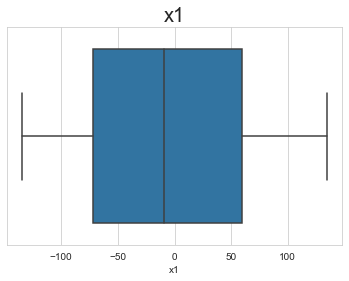

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


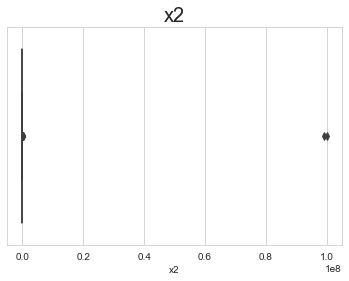

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


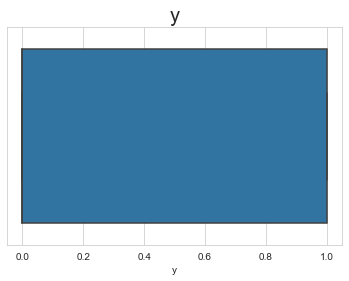

In [148]:
for c in ['x1', 'x2', 'y']:
    #plt.figure(figsize=(3, 3))
    sns.boxplot(df[c])
    plt.title(c, fontsize=20)
    plt.show()

### We see outliers in x2 only

### Plotting Regression Fit with respect to target variable to visualize and find outliers 

### Outliers using Regression Fit

<AxesSubplot:title={'center':'x2 X y'}, xlabel='x2', ylabel='y'>

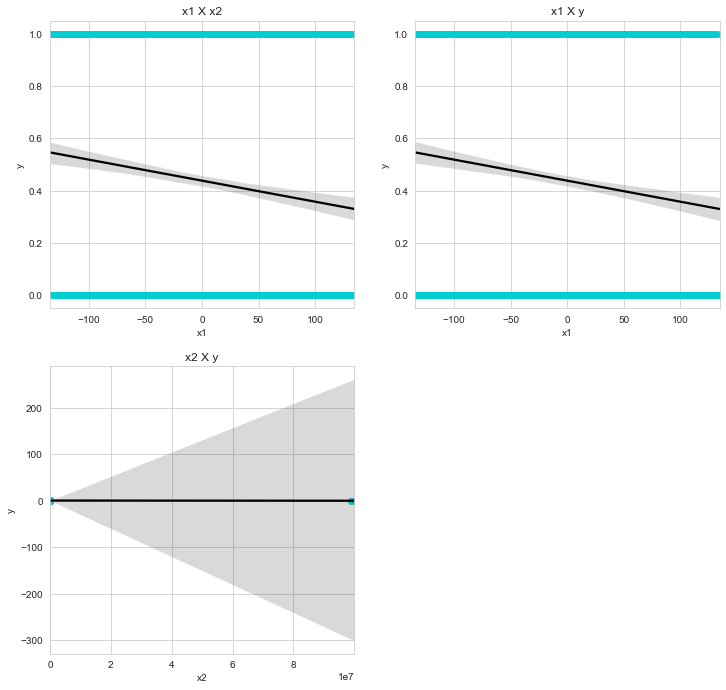

In [149]:
sns.set_style("whitegrid")
c = "darkturquoise"
#c = "lightsalmon"
#c = "crimson"

plt.figure(figsize = (12, 18))
plt.subplot(3, 2, 1)
plt.title("x1 X x2")
sns.regplot(data = df, x = "x1", y = "y", color = c, line_kws = {"color" : "black"})
plt.subplot(3, 2, 2)
plt.title("x1 X y")
sns.regplot(data = df, x = "x1", y = "y", color = c, line_kws = {"color" : "black"})
plt.subplot(3, 2, 3)
plt.title("x2 X y")
sns.regplot(data = df, x = "x2", y = "y", color = c, line_kws = {"color" : "black"})
#plt.subplot(3, 2, 4)

**we see outliers in x2 only**

### Outliers Using IQR

In [150]:
def highlight_outliers(outliers, col):
    outliers_index = outliers.index
    i = pd.IndexSlice[outliers_index, col]
    return outliers.style.applymap(lambda x: "background-color: red", subset = i).format(format_dict)

In [151]:
def detect_outlier(col):
    quartile1 = col.quantile(0.25)
    quartile3 = col.quantile(0.75)
    IQR = quartile3 - quartile1
    lower = quartile1 - (1.5 * IQR)
    upper = quartile3 +  (1.5 * IQR)
    return lower, upper

col1=df['x1']
print("Outliers of X1")
detect_outlier(col1)

Outliers of X1


(-268.4075, 256.4525)

In [152]:
lower,upper = detect_outlier(df['x1'])
df['x1'] = np.where(df['x1']<lower,lower,df['x1'])
df['x1'] = np.where(df['x1']>upper,upper,df['x1'])

In [153]:
df_outliers = df.loc[df["x1"] < -268].copy()
highlight_outliers(df_outliers, "x1")
#No values exist outside the outlier range

,x1,x2,y


In [154]:
df_outliers = df.loc[df["x1"] >256].copy()
highlight_outliers(df_outliers, "x1")
#No values exist outside the outlier range

,x1,x2,y


In [155]:
col1=df['x2']
print("Outliers of X2")
detect_outlier(col1)

Outliers of X2


(-296.28999999999996, 280.54999999999995)

In [156]:
lower,upper = detect_outlier(df['x2'])
df['x2'] = np.where(df['x2']<lower,lower,df['x2'])
df['x2'] = np.where(df['x2']>upper,upper,df['x2'])

In [157]:
df_outliers = df.loc[df["x2"] > 279].copy()
highlight_outliers(df_outliers, "x2")

,x1,x2,y
44,-99.63,280.5,1.0
841,-64.37,280.5,1.0
1092,55.16,280.5,0.0
1430,-74.13,280.5,0.0
1541,66.63,280.5,0.0
1573,32.63,280.5,0.0
2226,109.62,280.5,0.0


In [158]:
# Transforming them into NaN values
df.loc[df["x2"] > 279, "x2"] = np.nan

### Imputing Outliers

In [159]:
df['x2']=df['x2'].fillna(df['x2'].mean())

In [160]:
df_outliers = df.loc[df["x2"] > 279].copy()
highlight_outliers(df_outliers, "x2")

,x1,x2,y


In [161]:
df['y']=df['y'].fillna(df['y']==1)

In [162]:
df.isna().sum()

x1    0
x2    0
y     0
dtype: int64

**we dont see outliers now**

### Pie Chart for Y Column

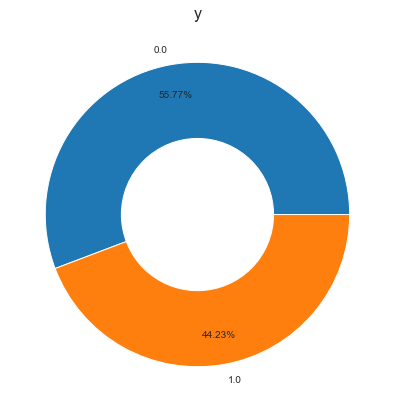

In [163]:
df_y = df["y"].value_counts()

plt.figure(figsize = (7,7))
plt.pie(data = df_y, x = df_y.values, labels = df_y.index, autopct = "%.2f%%", pctdistance = 0.8 )
circle = plt.Circle(xy = (0, 0), radius = 0.5, facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("y", size = 16)
plt.show()

# Machine Learning Models

In [251]:
X = df.drop(["y"], axis = 1).copy()
y = df["y"].copy()

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=40)

## 1.Logistic Regression 

In [253]:
classifier = LogisticRegression(solver = 'lbfgs', random_state = 0)

In [254]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [255]:
LogisticRegression(C = 1.0,class_weight = None, dual = False,
 fit_intercept = True,
 intercept_scaling = 1, max_iter = 100, multi_class = 'warn',
 n_jobs = None, penalty = '12', random_state = 0, solver = 'lbfgs', tol = 0.0001, verbose = 0, warm_start = False)

LogisticRegression(multi_class='warn', penalty='12', random_state=0)

In [256]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
Logistic_Regression=accuracy_score(y_test, y_pred)
print("Accuracy of testing data is:",metrics.accuracy_score(y_test, y_pred))

[[133   3]
 [ 48  39]]
Accuracy of testing data is: 0.7713004484304933


In [257]:
prediction = classifier.predict(X_test)
rmse_Lreg = np.sqrt(mean_squared_error(y_test, prediction))
print('RMSE value is = {}'.format(rmse_Lreg))
r2_Lreg = r2_score(y_test, prediction)
print('R-squared value is {}'.format(r2_Lreg))

RMSE value is = 0.47822541920051337
R-squared value is 0.03879310344827591


## 2.SVM WITH LINEAR KERNAL

In [258]:
C = 5
alpha = 1 / (C * len(X))


lin_clf = LinearSVC(loss = "hinge", random_state=42) #LinearSVC classifier

In [259]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [260]:
lin_clf.fit(x_scaled, y)

E:\anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(loss='hinge', random_state=42)

In [261]:
print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)

LinearSVC:                    [-0.78592281] [[-0.66703049  0.61522214]]


### Another method

In [262]:
from sklearn.svm import SVC
model = SVC()

In [263]:
model.fit(X_train, y_train)

SVC()

In [264]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0.])

In [265]:
model.score(X_test, y_test)

0.9192825112107623

In [266]:
from sklearn import metrics
print("Accuracy of testing data is:",metrics.accuracy_score(y_test, y_pred))

Accuracy of testing data is: 0.9192825112107623


In [267]:
model_K = SVC(kernel='linear')
model_K.fit(X_train, y_train)
model_K.score(X_test, y_test)

0.7668161434977578

In [268]:
y_pred = model_K.predict(X_test)
y_pred

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [269]:
Linear=metrics.accuracy_score(y_test, y_pred)
print("Accuracy of linear kernel is:",Linear)

Accuracy of linear kernel is: 0.7668161434977578


## 3. SVM WITH RBF KERNEL

In [270]:
model_K = SVC(kernel='rbf')
model_K.fit(X_train, y_train)
model_K.score(X_test, y_test)

0.9192825112107623

In [271]:
y_pred = model_K.predict(X_test)
y_pred

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0.])

In [272]:
Rbf=metrics.accuracy_score(y_test, y_pred)
print("Accuracy of rbf kernel is:",Rbf)

Accuracy of rbf kernel is: 0.9192825112107623


### Parameter Tuning

In [289]:
model_g = SVC(gamma=1)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9192825112107623

In [310]:
model_g = SVC(gamma=67)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9192825112107623

In [318]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9147982062780269

In [319]:
model_C = SVC(C=100)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9192825112107623

**We observe very slight difference in model score when tuned the parameters**

## 4.DECISION TREE

In [273]:
regressor1 = DecisionTreeRegressor(random_state = 0)
regressor1.fit(X_train, y_train)
prediction4 = regressor1.predict(X_test)
dt_reg = np.sqrt(mean_squared_error(y_test, prediction4))
print('RMSE value is = {}'.format(dt_reg))
r2_dt_reg = r2_score(y_test, prediction4)
print('R-squared value is {}'.format(r2_dt_reg))
Decision_Tree=metrics.accuracy_score(y_test, y_pred)
print("Accuracy of testing data is:",Decision_Tree)

RMSE value is = 0.26785981207297
R-squared value is 0.6984448951994591
Accuracy of testing data is: 0.9192825112107623


In [274]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [275]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
Decision_Tree=accuracy_score(y_test, y_pred)
print(Decision_Tree)

[[125  11]
 [  4  83]]
0.9327354260089686


## 5.KNN

In [276]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [277]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [278]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[126  10]
 [  3  84]]


0.9417040358744395

In [279]:
Knn=metrics.accuracy_score(y_test, y_pred)
print("Accuracy of testing data is:",knn)

Accuracy of testing data is: 0.9417040358744395


## Comparision of Models

In [280]:
print("Accuracy of testing data for Logistic Regression Model is:",Logistic_Regression)
print("Accuracy of testing data for SVM with Linear Kernel is:",Linear)
print("Accuracy of testing data for SVM with Rbf Kernel is:",Rbf)
print("Accuracy of testing data for Decision Tree Model is:",Decision_Tree)
print("Accuracy of testing data for KNN Model is:",Knn)

Accuracy of testing data for Logistic Regression Model is: 0.7713004484304933
Accuracy of testing data for SVM with Linear Kernel is: 0.7668161434977578
Accuracy of testing data for SVM with Rbf Kernel is: 0.9192825112107623
Accuracy of testing data for Decision Tree Model is: 0.9327354260089686
Accuracy of testing data for KNN Model is: 0.9417040358744395


## Conclusion
**With KNN being the highest accuracy ,it is the best fit for the data**
**While SVM with RBF kernel and Decision Tree is not negligible,there is very slight difference in accuracy,which can still be effective for the data**